# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla_{w} Q(w) = \dfrac{-2}{\ell} X^T \left( y - Xw \right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
import sklearn.metrics
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [6]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [7]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:
https://contest.yandex.ru/contest/41257/run-report/73098363/


* **StochasticDescent**:
https://contest.yandex.ru/contest/41257/run-report/73097268/


* **MomentumDescent**:
https://contest.yandex.ru/contest/41257/run-report/73098727/


* **Adam**:
https://contest.yandex.ru/contest/41257/run-report/73099673/


* **LinearRegression**:
https://contest.yandex.ru/contest/41257/run-report/73099937/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [9]:
data = pd.read_csv('autos.csv')

In [10]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [11]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage'] # 'model'
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

<AxesSubplot:xlabel='price', ylabel='Count'>

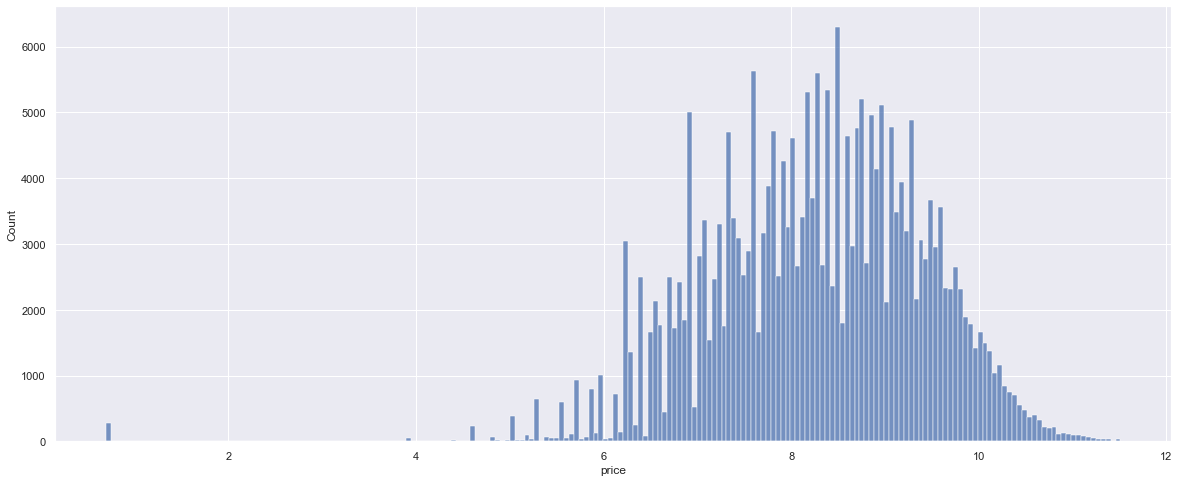

In [10]:
sns.set(rc={'figure.figsize':(20, 8)})
sns.histplot(np.log1p(data['price']))

Распределение логарифма похоже на нормальное, и на его графике лучше видно распределение цен, поэтому будем рассматривать его. Видно, что есть некоторое количество машин с очень маленькой ценой, обрежем цены ниже 5.

In [13]:
data['log_price'] = np.log1p(data['price'])

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_price'>

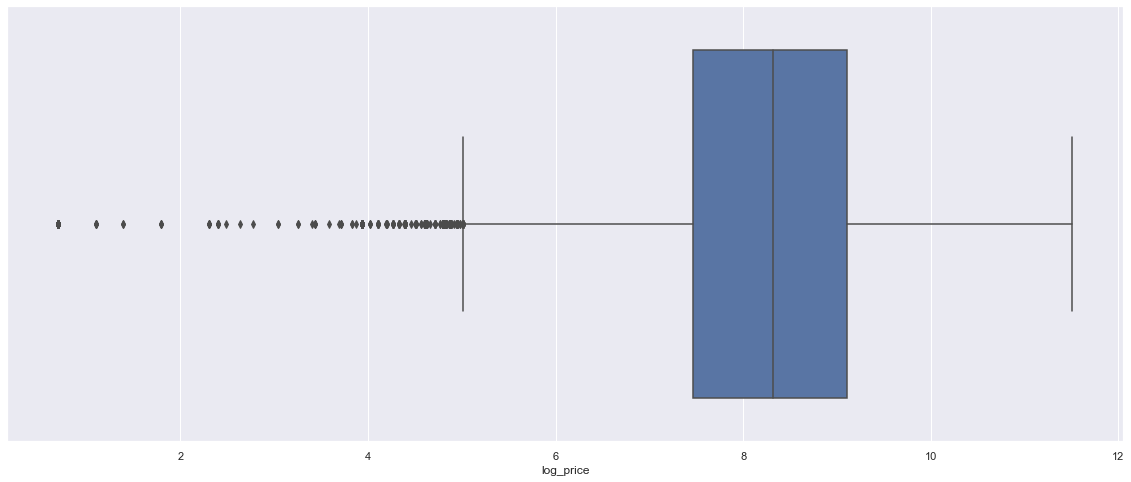

In [12]:
sns.boxplot(data['log_price'])

In [14]:
data.drop(data[data['log_price'] < 5].index, inplace=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

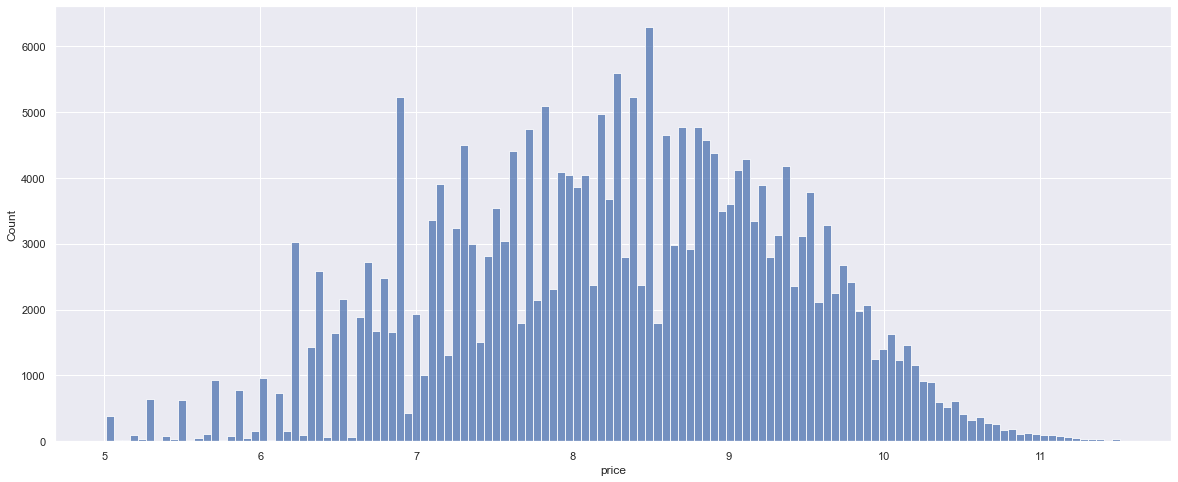

In [14]:
sns.histplot(np.log1p(data['price']))

<AxesSubplot:xlabel='brand', ylabel='Count'>

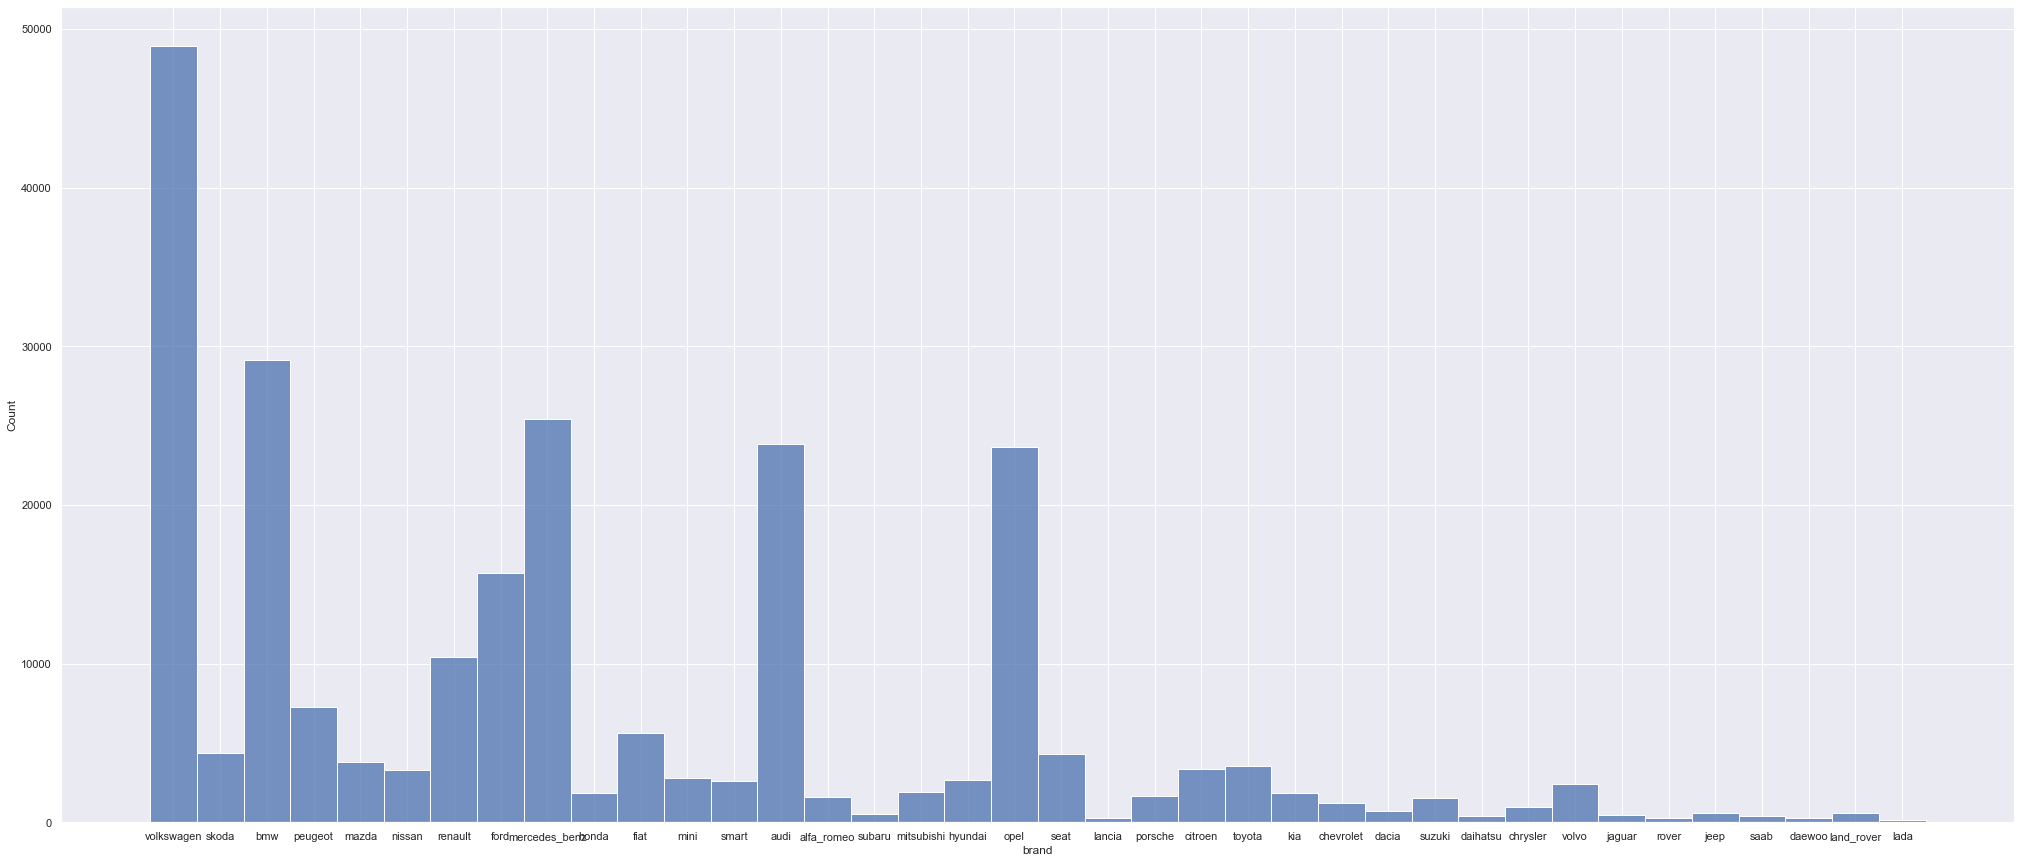

In [15]:
sns.set(rc={'figure.figsize':(35, 15)})
sns.histplot(data['brand'])

<AxesSubplot:xlabel='brand', ylabel='log_price'>

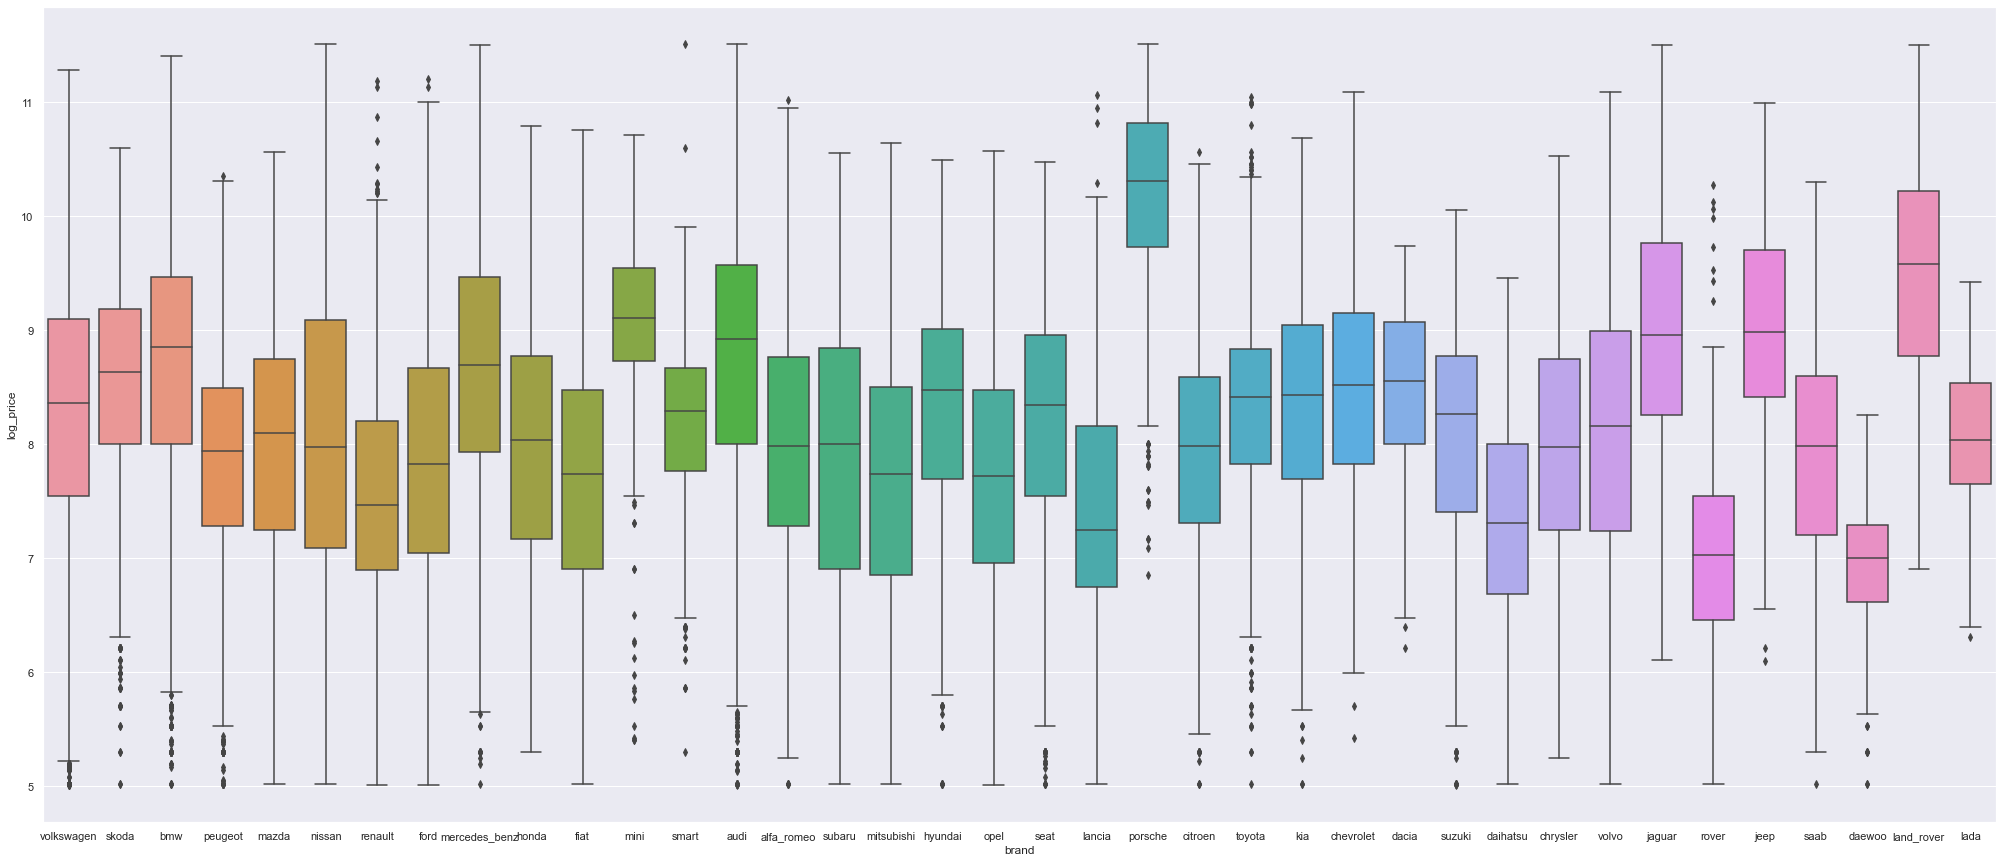

In [16]:
sns.set(rc={'figure.figsize':(35, 15)})
sns.boxplot(data=data, x='brand', y='log_price')

<AxesSubplot:xlabel='vehicleType', ylabel='Count'>

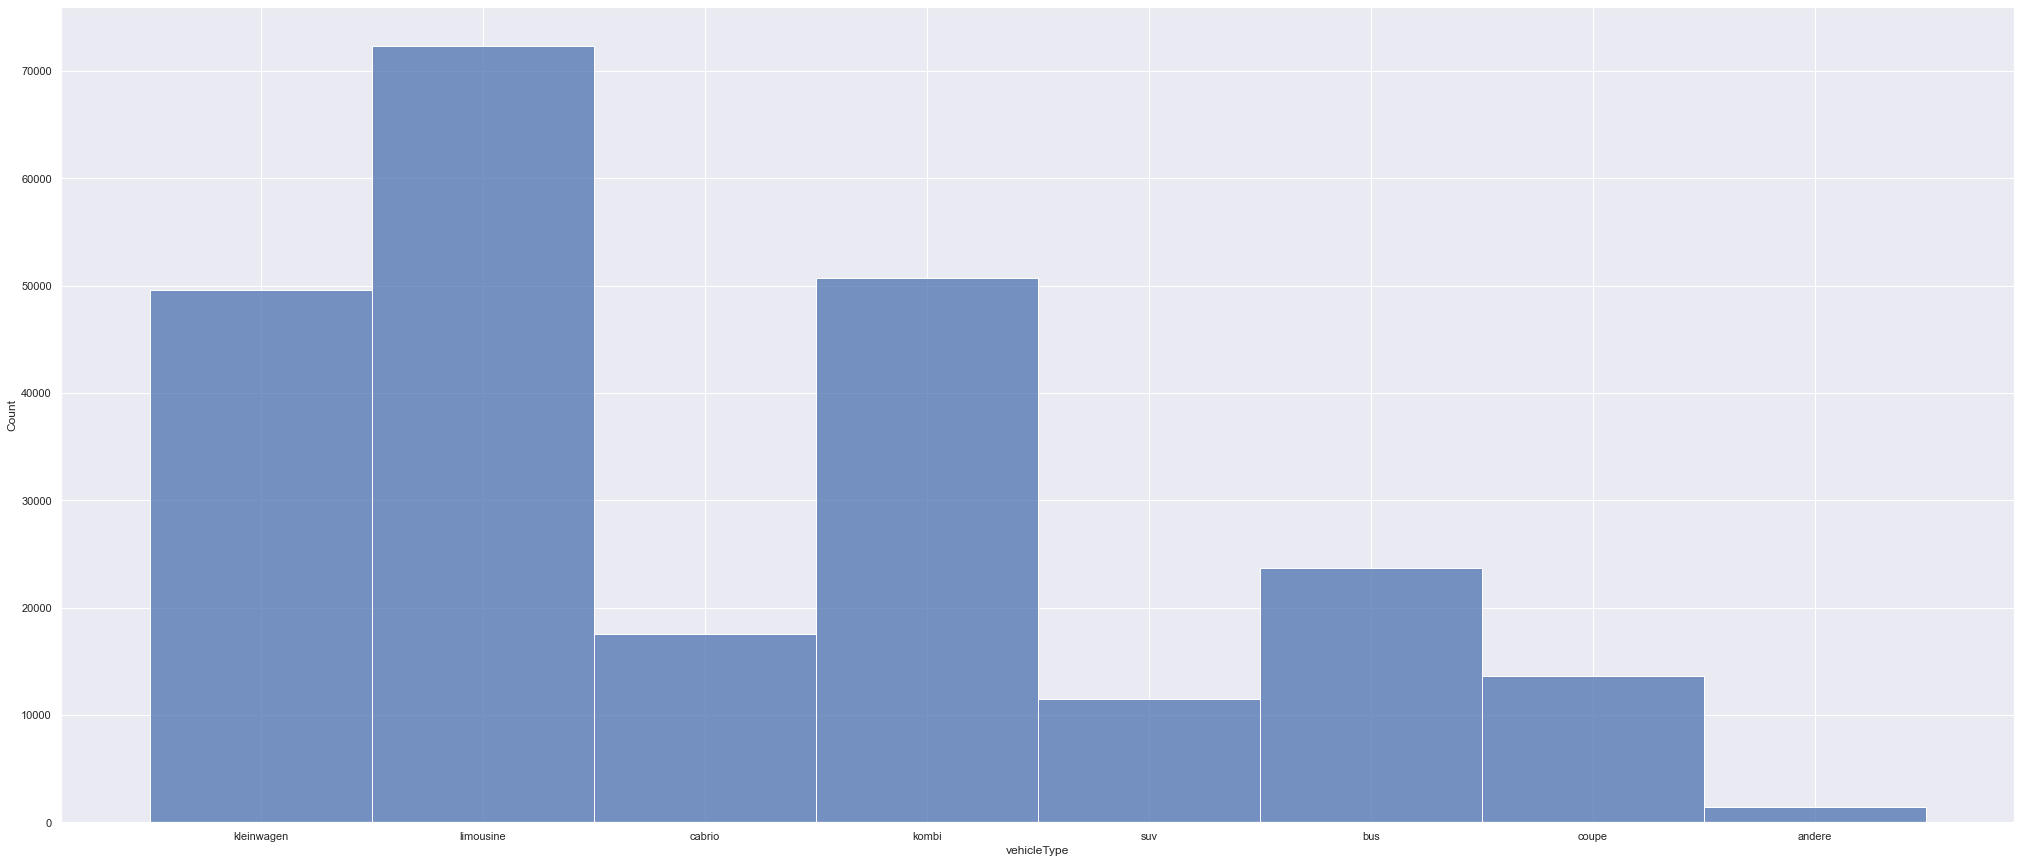

In [17]:
sns.set(rc={'figure.figsize':(35, 15)})
sns.histplot(data['vehicleType'])

<AxesSubplot:xlabel='vehicleType', ylabel='log_price'>

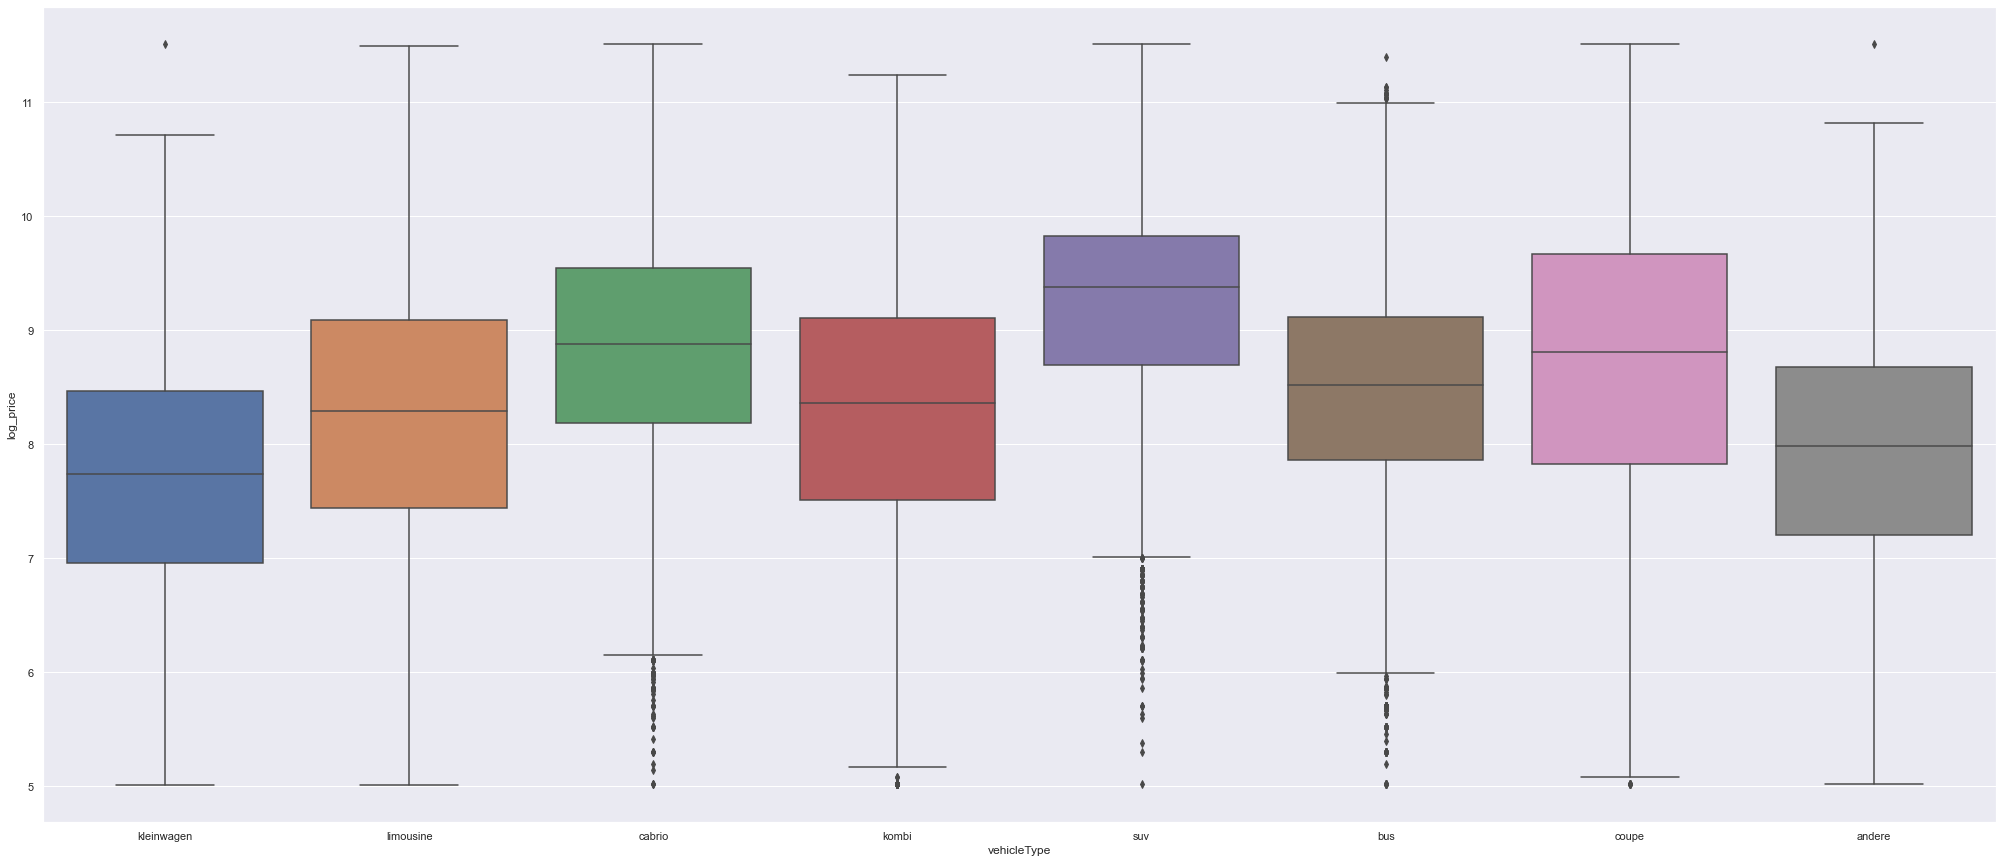

In [18]:
sns.set(rc={'figure.figsize':(35, 15)})
sns.boxplot(data=data, x='vehicleType', y='log_price')

<AxesSubplot:xlabel='gearbox', ylabel='Count'>

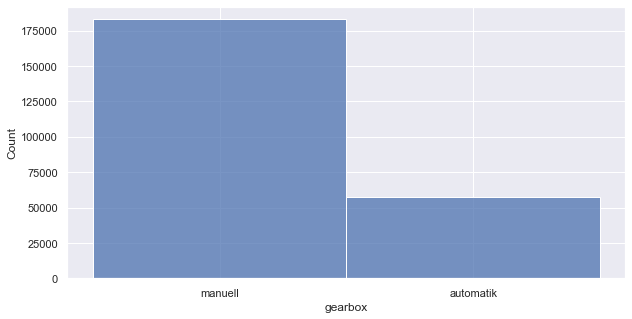

In [19]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(data['gearbox'])

<AxesSubplot:xlabel='gearbox', ylabel='log_price'>

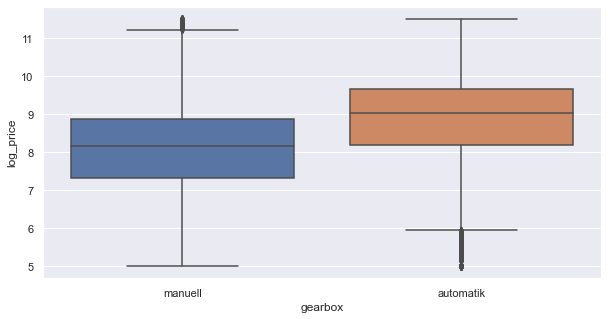

In [20]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot(data=data, x='gearbox', y='log_price')

<AxesSubplot:xlabel='fuelType', ylabel='Count'>

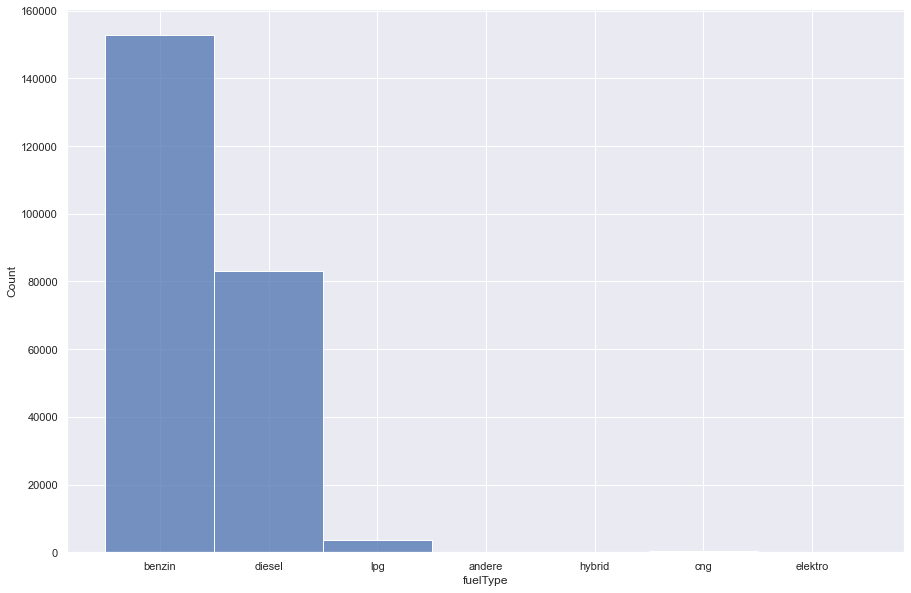

In [21]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.histplot(data['fuelType'])

<AxesSubplot:xlabel='fuelType', ylabel='log_price'>

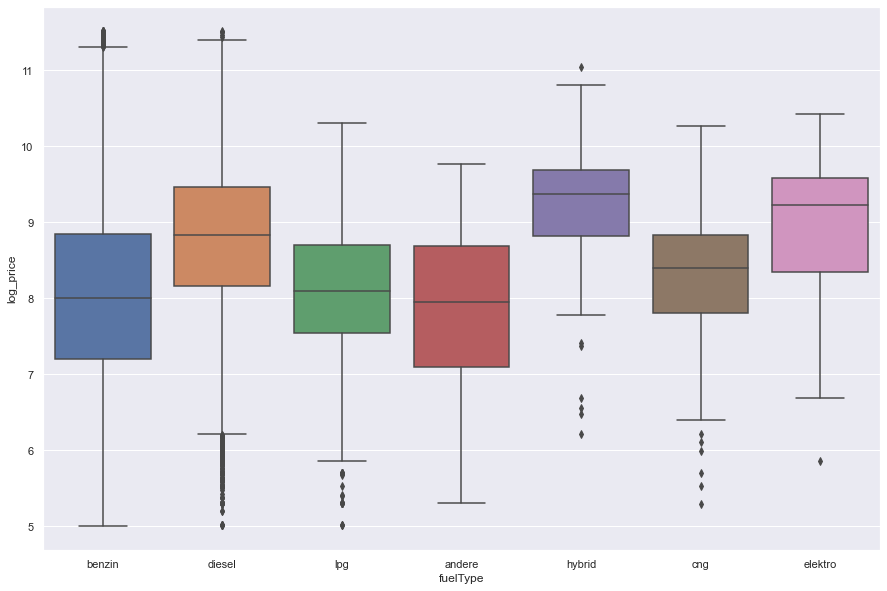

In [22]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(data=data, x='fuelType', y='log_price')

**От типа топлива и коробки передач, типа машины и бренда цена явно зависит.**

<AxesSubplot:xlabel='notRepairedDamage', ylabel='Count'>

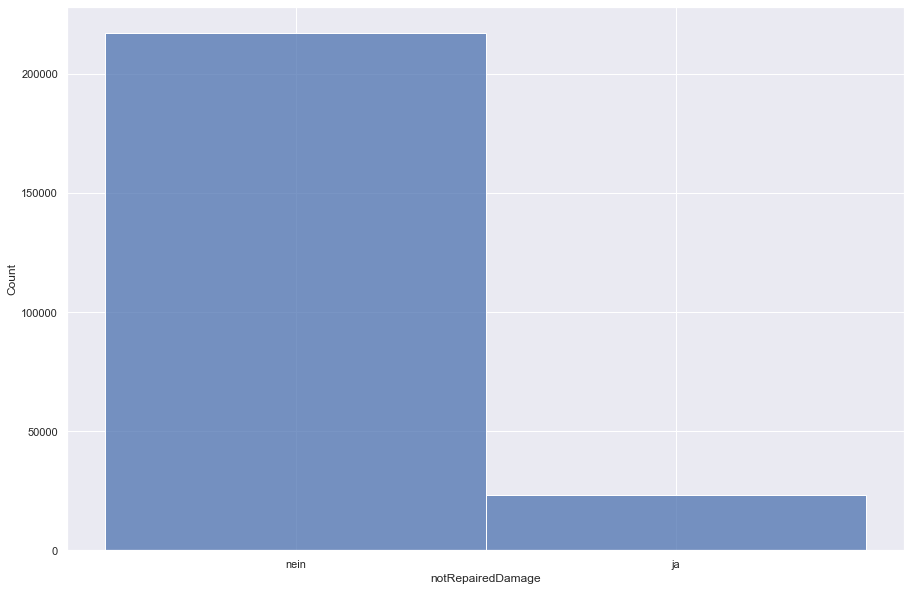

In [23]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.histplot(data['notRepairedDamage'])

<AxesSubplot:xlabel='notRepairedDamage', ylabel='log_price'>

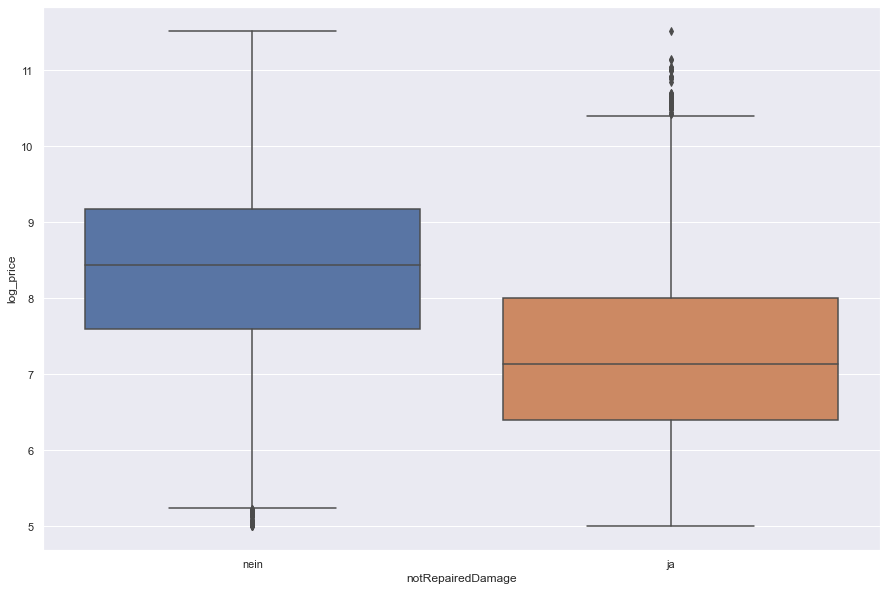

In [24]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(data=data, x='notRepairedDamage', y='log_price')

**Очевидно и видно по графику, что от наличия поломки цена достаточно сильно зависит**

<AxesSubplot:xlabel='model', ylabel='Count'>

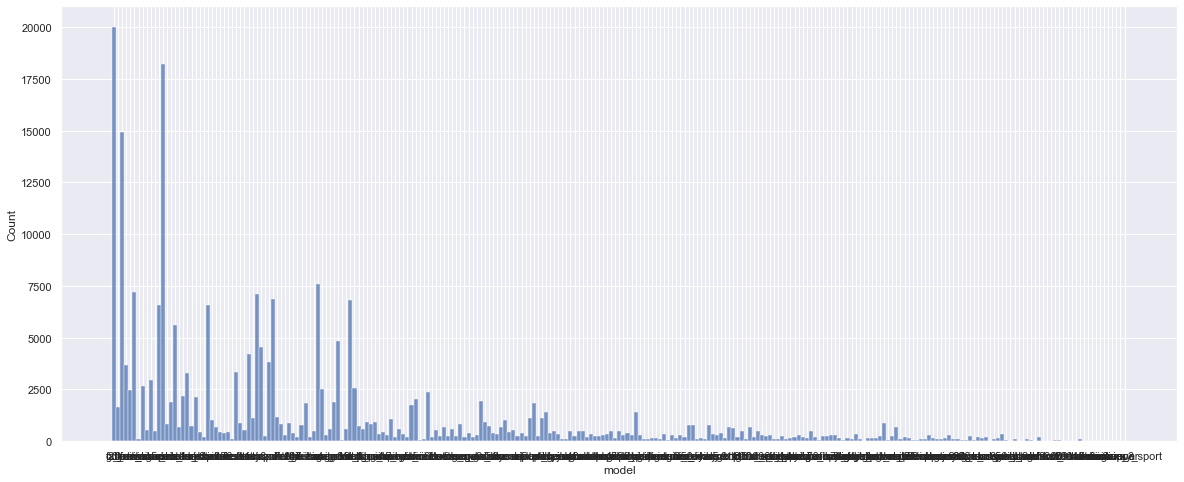

In [25]:
sns.set(rc={'figure.figsize':(20, 8)})
sns.histplot(data['model'])

In [26]:
data['model'].value_counts()[:40]

golf           20004
andere         18205
3er            14947
a4              7577
passat          7219
astra           7132
polo            6882
corsa           6829
5er             6583
c_klasse        6581
e_klasse        5633
a3              4823
a6              4572
focus           4219
transporter     3804
2_reihe         3673
fiesta          3327
1er             3309
a_klasse        2936
twingo          2676
vectra          2553
touran          2523
3_reihe         2497
mondeo          2383
clio            2181
fortwo          2160
zafira          2060
x_reihe         1957
megane          1910
punto           1906
ibiza           1859
cooper          1844
octavia         1758
fabia           1632
ka              1412
clk             1404
slk             1160
tt              1133
caddy           1123
leon            1115
Name: model, dtype: int64

**Судя по большому количеству различных моделей сам по себе признак "model" не очень хорош, лучше было бы взять самые популярные модели и сделать категориальные признаки по ним, а тем машинам, которые не входят в это множества ставить категорию 0, это позволило бы модели больше обучиться определению цен на популярные модели.**

<AxesSubplot:xlabel='powerPS', ylabel='Count'>

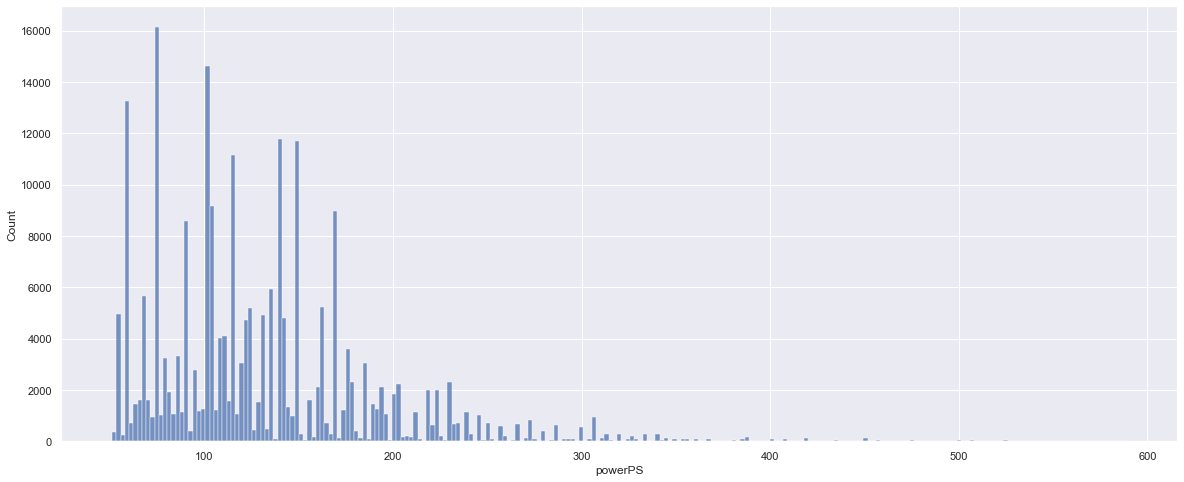

In [27]:
sns.histplot(data['powerPS'])

In [28]:
print(data['powerPS'].max(), data['powerPS'].min())

589 51


In [29]:
gk = data.groupby(pd.cut(data['powerPS'], np.arange(51, 602, 50)))['log_price'].agg('mean').reset_index()

In [30]:
gk['powerPS'] = gk['powerPS'].astype(str)

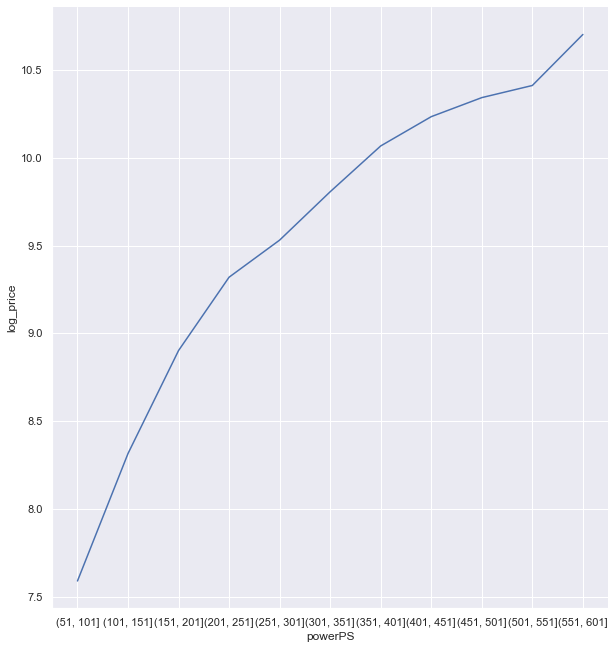

In [31]:
sns.relplot(data=gk, x='powerPS', y='log_price', kind='line').figure.set_size_inches(10, 10)

In [32]:
print(data['kilometer'].min(), data['kilometer'].max())

5000 150000


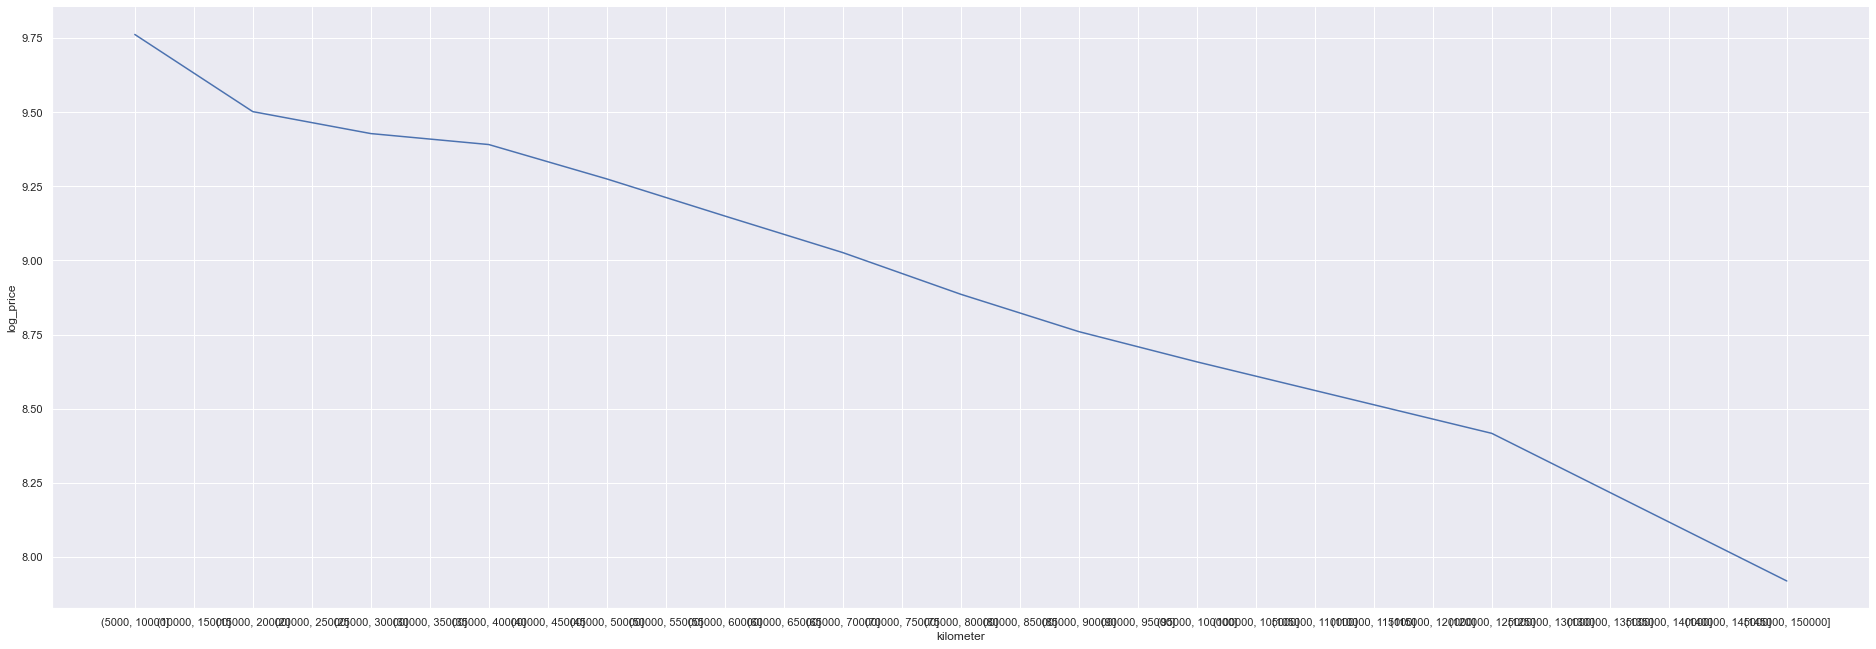

In [33]:
gk = data.groupby(pd.cut(data['kilometer'], np.arange(5000, 150001, 5000)))['log_price'].agg('mean').reset_index()
gk['kilometer'] = gk['kilometer'].astype(str)
sns.relplot(data=gk, x='kilometer', y='log_price', kind='line').figure.set_size_inches(35, 10)

In [34]:
print(data['autoAgeMonths'].min(), data['autoAgeMonths'].max())

1 600


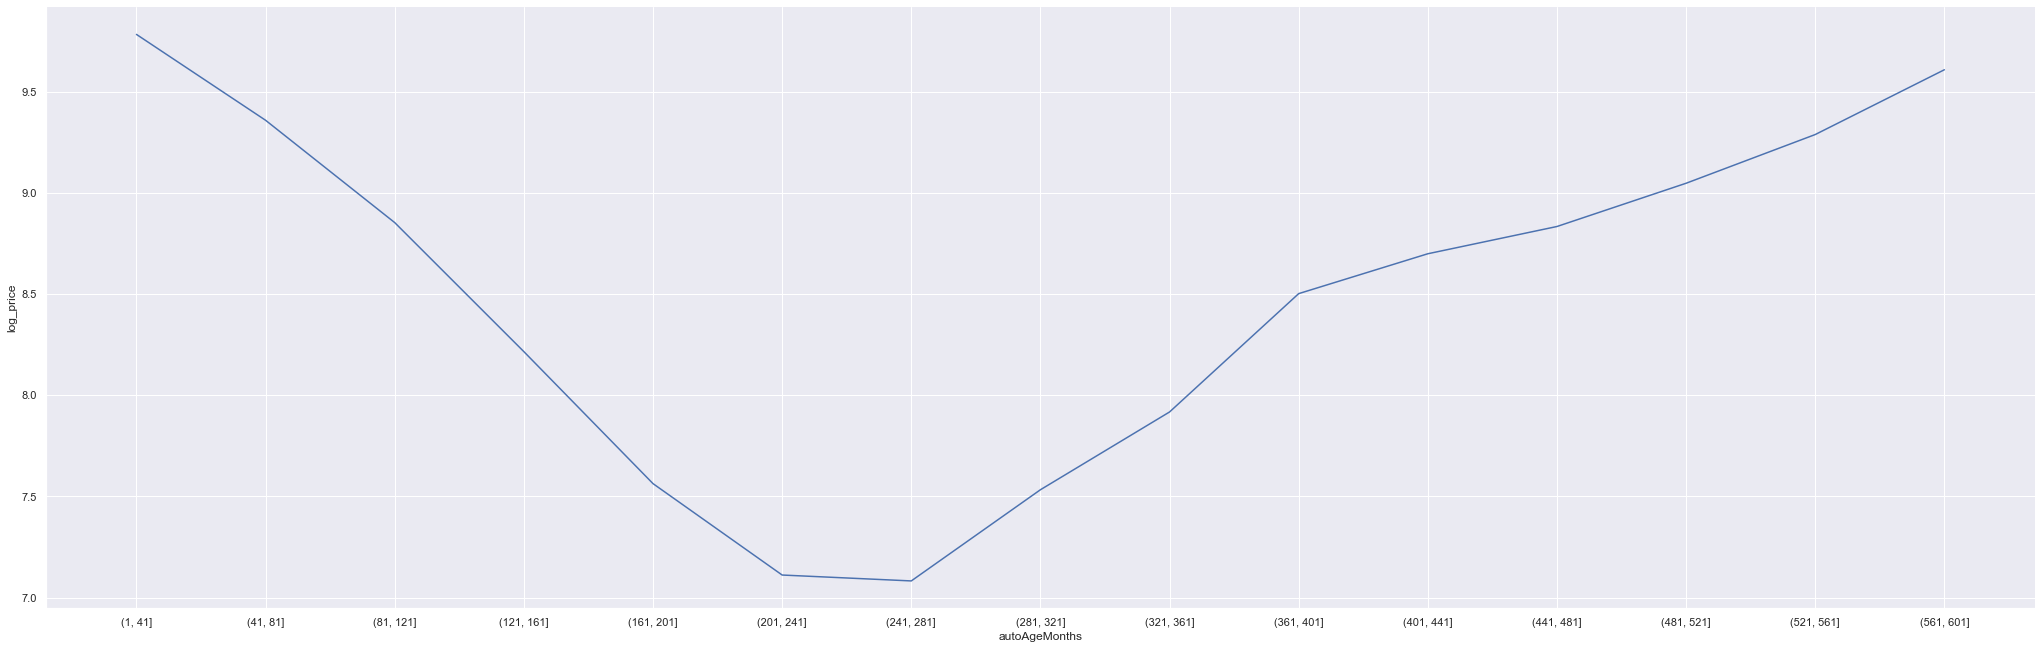

In [35]:
gk = data.groupby(pd.cut(data['autoAgeMonths'], np.arange(1, 602, 40)))['log_price'].agg('mean').reset_index()
gk['autoAgeMonths'] = gk['autoAgeMonths'].astype(str)
sns.relplot(data=gk, x='autoAgeMonths', y='log_price', kind='line').figure.set_size_inches(35, 10)

**Чем больше пробег, тем ниже цена. Чем больше мощность, тем выше цена. Видим, что если возраст машины маленький, то цена высокая, затем идет постепенное снижение средней цены и дальше с ростом возраста цена снова растет, скорее всего это связано с тем, что ретро-автомобили стоят дороже, так как редкие.**

In [15]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=14)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

Для начала определим некоторый бейслайн при константном предсказании

In [89]:
from sklearn.metrics import mean_squared_error
print("Baseline MSE:")
print(mean_squared_error(y_val, [y.mean()] * y_val.shape[0], squared=True))

Baseline MSE:
1.2359802574099135


In [90]:
x.shape[1]

61

In [97]:
def get_loss_lr(learn_rate, descent_n):
    conf = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    return reg.calc_loss(X_val, y_val)
    

descents = ['full', 'stochastic', 'momentum', 'adam']
search_results = {}
for descent in descents:
    best_lr = 0
    best_loss = 1e8
    for lr in np.logspace(-5, 1, 10):
        print(f'{descent} descent with lr={lr}... ')
        loss = get_loss_lr(lr, descent)
        print(f'loss={loss}\n')
        if loss < best_loss:
            best_loss = loss
            best_lr = lr
    search_results[descent] = {
        'best_lr': best_lr,
        'lr_loss': best_loss
    }

full descent with lr=1e-05... 
loss=29.705891781019396

full descent with lr=4.641588833612782e-05... 
loss=37.35723698906726

full descent with lr=0.00021544346900318823... 
loss=27.88403585928283

full descent with lr=0.001... 
loss=29.008493874515146

full descent with lr=0.004641588833612777... 
loss=17.673829765219807

full descent with lr=0.021544346900318822... 
loss=1.8135516305660384

full descent with lr=0.1... 
loss=0.48994801407595145

full descent with lr=0.46415888336127725... 
loss=0.39324947505340874

full descent with lr=2.154434690031882... 
loss=2.312513383295255

full descent with lr=10.0... 
loss=inf

stochastic descent with lr=1e-05... 
loss=29.31008979402951

stochastic descent with lr=4.641588833612782e-05... 
loss=30.752402100904753

stochastic descent with lr=0.00021544346900318823... 
loss=34.996575457758354

stochastic descent with lr=0.001... 
loss=26.923700252016005

stochastic descent with lr=0.004641588833612777... 
loss=18.02040764466438

stochastic des

In [98]:
search_results

{'full': {'best_lr': 0.46415888336127725, 'lr_loss': 0.39324947505340874},
 'stochastic': {'best_lr': 0.46415888336127725, 'lr_loss': 0.3392698858230594},
 'momentum': {'best_lr': 0.46415888336127725, 'lr_loss': 0.32463339024326143},
 'adam': {'best_lr': 0.46415888336127725, 'lr_loss': 0.2997547647353602}}

In [132]:
from sklearn.metrics import r2_score, mean_squared_error

def get_metrics(learn_rate, descent_n):
    conf = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)
    return {'train mse': mean_squared_error(y_train_pred, y_train, squared=True),
            'test mse': mean_squared_error(y_test_pred, y_test, squared=True),
            'test r2': r2_score(y_test, y_test_pred),
            'iter before convergence': len(reg.loss_history)}, reg.loss_history

r2_metrics = {}
loss_histories = {}
for descent in search_results.keys():
    r2_metrics[descent], loss_histories[descent] = get_metrics(search_results[descent]['best_lr'], descent)

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [133]:
pd.DataFrame(r2_metrics)

,full,stochastic,momentum,adam
train mse,0.398288,0.362417,0.317585,0.295474
test mse,0.396724,0.361705,0.316695,0.292965
test r2,0.679729,0.707999,0.744335,0.763492
iter before convergence,42.000000,119.000000,84.000000,85.000000


[Text(0.5, 0, 'iteration number'), Text(0, 0.5, 'loss')]

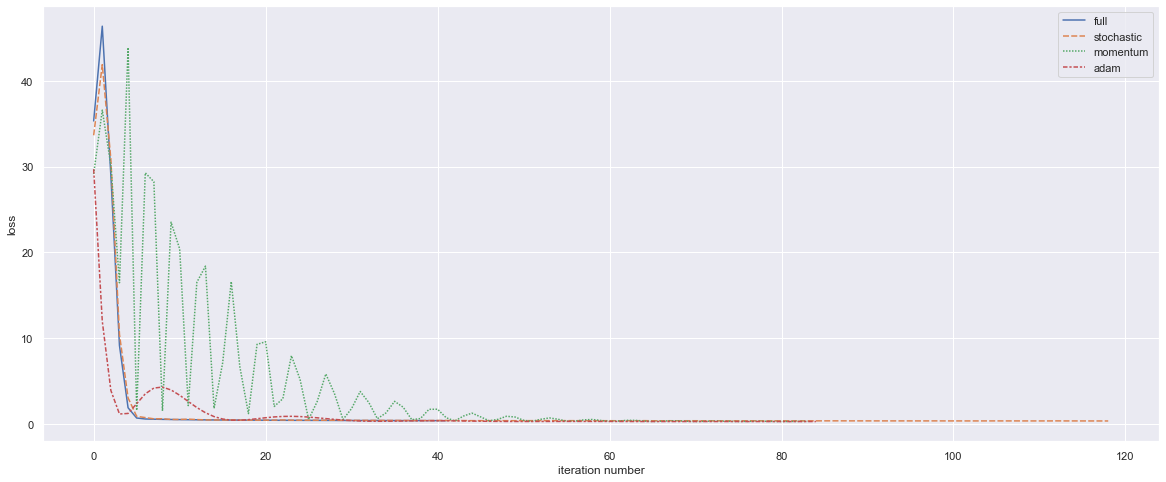

In [138]:
sns.lineplot(data=loss_histories).set(xlabel='iteration number', ylabel='loss')

По таблице видим, что полному градиентному спуску надо меньше всего итераций для сходимости, побольше надо Адаму (но по графику видно, что ошибка уменьшается быстрее, чем у полного градиента). Градиентный спуск с моментом требует чуть больше итераций, чем Адам, но по графику ошибки видим, что она не монотонно убывает и достаточно медленно. Стохастический градиентный спуск требует больше всего итераций, но, так как там идет подсчет градиента по бачу, скорее всего каждая итерация занимает гораздо меньше времени, чем для полных градиентов. У SGD ошибка падает практически так же, как и у полного градиентного спуска. Заметим, что лучшую r2-метрику дает метод Adam

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [124]:
import time

batch_sizes = np.arange(5, 500, 10)

def get_iter_counts(batch_size):
    conf = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': search_results['stochastic']['best_lr'],
            'batch_size': batch_size
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    print(f'with batch_size={batch_size} there are {len(reg.loss_history)} iterations')
    return len(reg.loss_history)

iter_counts = []
batch_size_times = []
for b_size in batch_sizes:
    cur_iter_counts = 0
    t0 = time.time()
    for k in range(10):
        cur_iter_counts += get_iter_counts(b_size)
    t1 = time.time()
    # result = timeit.timeit(stmt='cur_iter_counts += get_iter_counts(b_size)', globals=globals(), number=10)
    iter_counts.append(cur_iter_counts / 10)
    batch_size_times.append((t1 - t0) / 10)

with batch_size=5 there are 301 iterations
with batch_size=5 there are 301 iterations
with batch_size=5 there are 199 iterations
with batch_size=5 there are 301 iterations
with batch_size=5 there are 301 iterations
with batch_size=5 there are 138 iterations
with batch_size=5 there are 301 iterations
with batch_size=5 there are 184 iterations
with batch_size=5 there are 196 iterations
with batch_size=5 there are 212 iterations
with batch_size=15 there are 259 iterations
with batch_size=15 there are 301 iterations
with batch_size=15 there are 193 iterations
with batch_size=15 there are 233 iterations
with batch_size=15 there are 215 iterations
with batch_size=15 there are 155 iterations
with batch_size=15 there are 301 iterations
with batch_size=15 there are 222 iterations
with batch_size=15 there are 226 iterations
with batch_size=15 there are 189 iterations
with batch_size=25 there are 192 iterations
with batch_size=25 there are 198 iterations
with batch_size=25 there are 170 iteration

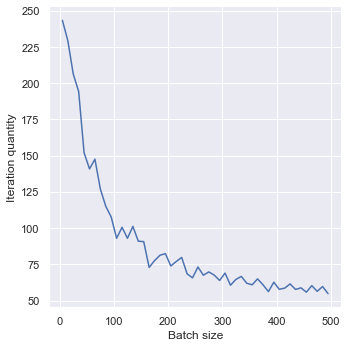

In [128]:
sns.relplot(x=batch_sizes, y=iter_counts, kind='line').set_axis_labels('Batch size', 'Iteration quantity')

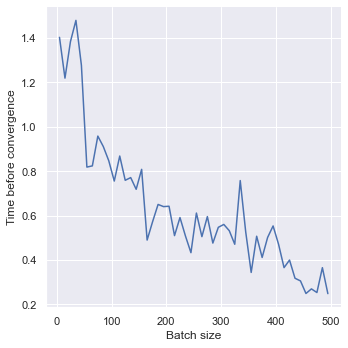

In [135]:
sns.relplot(x=batch_sizes, y=batch_size_times, kind='line').set_axis_labels('Batch size', 'Time before convergence')

По графикам видно, что при увеличении размера батча среднее время сходимости, как и количество итераций, падает. Мы не рассматривали большие размеры батча, но очевидно, что если увеличивать его размер и дальше, время сходимости начнет постепенно увеличиваться, так как расчет градиента будет занимать больше времени.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/73181184/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [194]:
def get_loss_lr_alpha_reg(learn_rate, mu, descent_n):
    conf = {
        'descent_name': descent_n,
        'regularized': True,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'mu': mu
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    return reg.calc_loss(X_val, y_val)


descents = ['full', 'stochastic', 'momentum', 'adam']
search_results_reg = {}
for descent in descents:
    best_lr = 0
    best_mu = 0
    best_loss = 1e9
    for lr in np.logspace(-5, 0.5, 8):
        for mu in np.logspace(-4, 0.3, 6):
            print(f'{descent} descent with lr={lr}, mu={mu}... ')
            loss = get_loss_lr_alpha_reg(lr, mu, descent)
            print(f'loss={loss}\n')
            if loss < best_loss:
                best_loss = loss
                best_lr = lr
                best_mu = mu
    search_results_reg[descent] = {
        'best_lr': best_lr,
        'best_mu': best_mu,
        'min_loss': best_loss
    }

full descent with lr=1e-05, mu=0.0001... 
loss=32.178915409471344

full descent with lr=1e-05, mu=0.0007244359600749898... 
loss=30.33049209454917

full descent with lr=1e-05, mu=0.005248074602497723... 
loss=27.82157550482933

full descent with lr=1e-05, mu=0.038018939632056124... 
loss=19.74918813272992

full descent with lr=1e-05, mu=0.2754228703338166... 
loss=29.057199884454967

full descent with lr=1e-05, mu=1.9952623149688795... 
loss=25.155301297579072

full descent with lr=6.105402296585326e-05, mu=0.0001... 
loss=20.55794182424094

full descent with lr=6.105402296585326e-05, mu=0.0007244359600749898... 
loss=36.73295087031835

full descent with lr=6.105402296585326e-05, mu=0.005248074602497723... 
loss=32.93531337070233

full descent with lr=6.105402296585326e-05, mu=0.038018939632056124... 
loss=25.323766275152597

full descent with lr=6.105402296585326e-05, mu=0.2754228703338166... 
loss=31.745170414926775

full descent with lr=6.105402296585326e-05, mu=1.9952623149688795..

In [196]:
pd.DataFrame(search_results_reg)

,full,stochastic,momentum,adam
best_lr,0.517947,0.517947,0.517947,0.517947
best_mu,0.038019,0.038019,0.005248,0.000100
min_loss,0.340263,0.328935,0.303476,0.299859


In [198]:
def get_metrics_reg(learn_rate, mu, descent_n):
    conf = {
        'descent_name': descent_n,
        'regularized': True,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'mu': mu
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)
    return {'train mse': mean_squared_error(y_train_pred, y_train, squared=True),
            'test mse': mean_squared_error(y_test_pred, y_test, squared=True),
            'test r2': r2_score(y_test, y_test_pred),
            'iter before convergence': len(reg.loss_history)}, reg.loss_history

r2_metrics_reg = {}
loss_histories_reg = {}
for descent in search_results_reg.keys():
    r2_metrics_reg[descent], loss_histories_reg[descent] = get_metrics_reg(search_results_reg[descent]['best_lr'],
                                                                           search_results_reg[descent]['best_mu'],
                                                                           descent)

In [202]:
full_losses = {}
for descent in loss_histories.keys():
    full_losses[descent] = {
        'regularized': loss_histories_reg[descent],
        'simple': loss_histories[descent],
    }

[Text(0.5, 0, 'iteration number'), Text(0, 0.5, 'loss')]

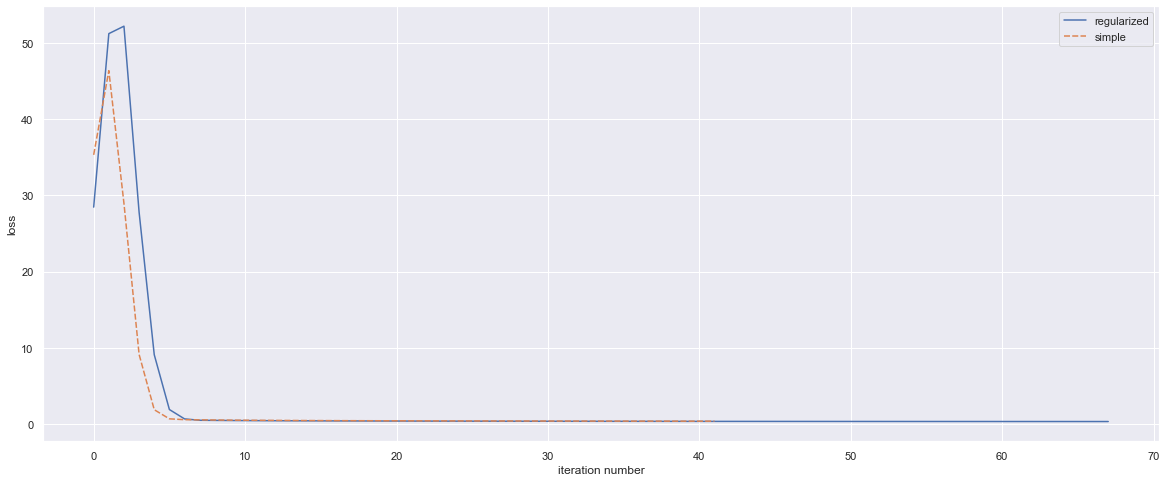

In [211]:
sns.lineplot(data=full_losses['full']).set(xlabel='iteration number', ylabel='loss')

[Text(0.5, 0, 'iteration number'), Text(0, 0.5, 'loss')]

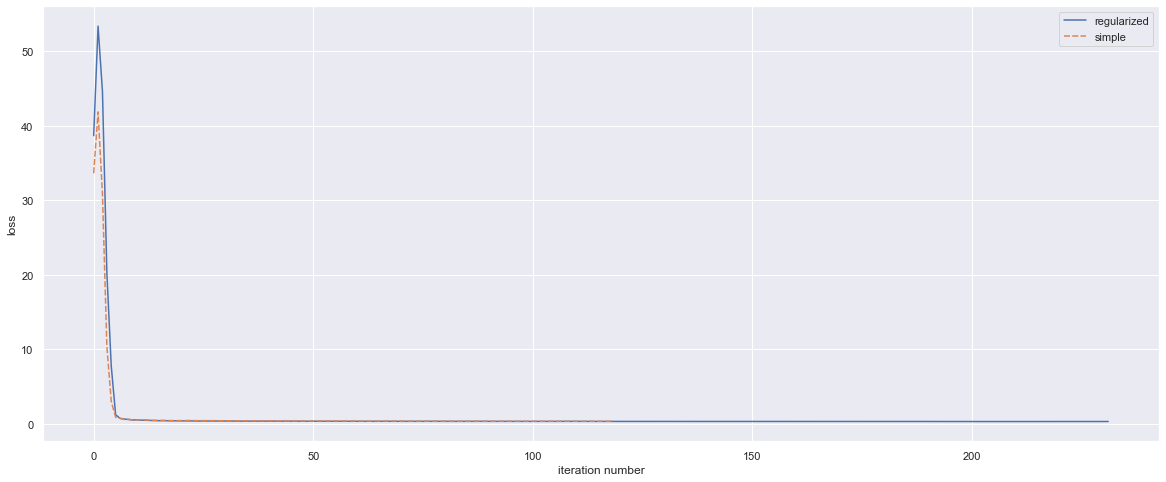

In [215]:
sns.lineplot(data=full_losses['stochastic']).set(xlabel='iteration number', ylabel='loss')

[Text(0.5, 0, 'iteration number'), Text(0, 0.5, 'loss')]

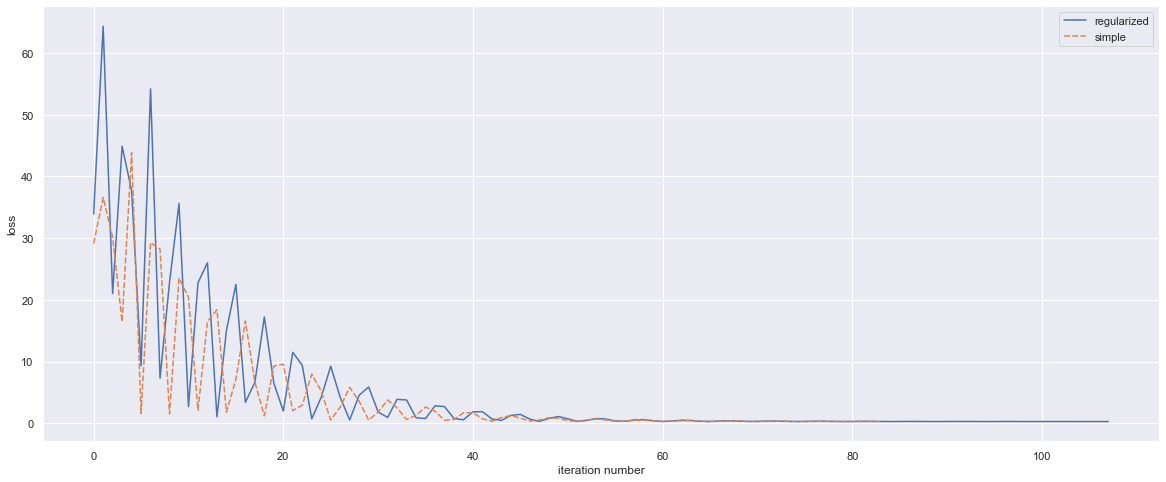

In [216]:
sns.lineplot(data=full_losses['momentum']).set(xlabel='iteration number', ylabel='loss')

[Text(0.5, 0, 'iteration number'), Text(0, 0.5, 'loss')]

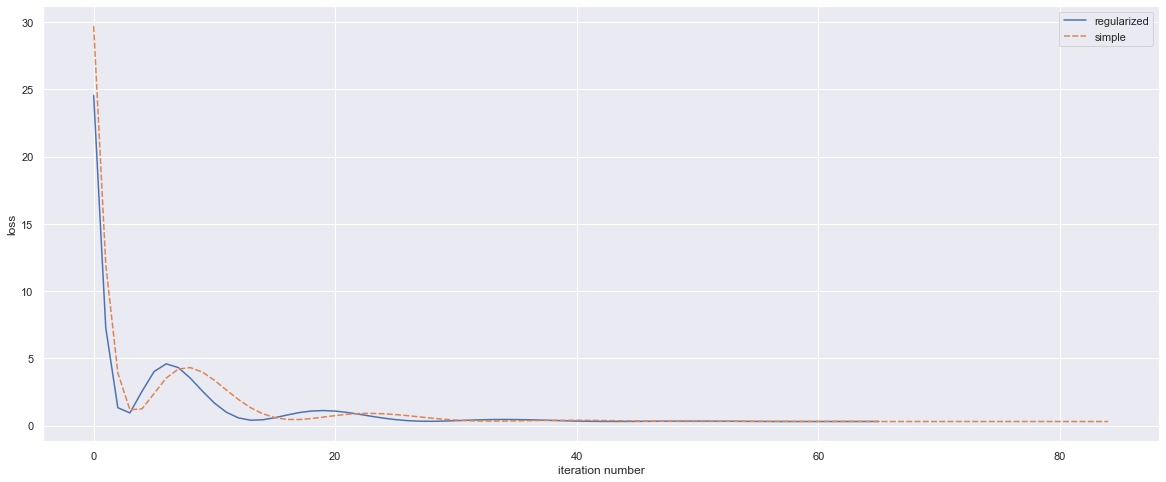

In [217]:
sns.lineplot(data=full_losses['adam']).set(xlabel='iteration number', ylabel='loss')

In [220]:
pd.DataFrame(r2_metrics)

,full,stochastic,momentum,adam
train mse,0.398288,0.362417,0.317585,0.295474
test mse,0.396724,0.361705,0.316695,0.292965
test r2,0.679729,0.707999,0.744335,0.763492
iter before convergence,42.000000,119.000000,84.000000,85.000000


In [221]:
pd.DataFrame(r2_metrics_reg)

,full,stochastic,momentum,adam
train mse,0.350693,0.332606,0.300271,0.301283
test mse,0.348632,0.329776,0.298087,0.299327
test r2,0.718553,0.733775,0.759357,0.758356
iter before convergence,68.000000,232.000000,108.000000,66.000000


По таблицам видно, что количество итераций у full, SGD, и SGD+M выросло (очевидно потому что теперь у модели дополнительные ограничения на веса), но у Adam стало меньше. Ошибки и на обучающей и на тестовой выборках у Full, SGD, SGD+M уменьшились, а у Adam увеличились. Скорее всего ошибка упала, так как модели стала меньше переобучаться. То же самое с R2-метрикой, у Adam она уменьшилась, у остальных стала лучше. По графикам видно, что у моделей с регуляризацией ошибка падает так же быстро или чуть медленнее, чем у модели без нее.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    L(y, a)' = (\log\left(\cosh(a - y)\right)' = x \cdot \frac{\sinh(a-y)}{\cosh(a-y)} = x \cdot \tanh(a-y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [227]:
print("Baseline Log_Cosh:")
print(1 / y_val.shape[0] * np.log(np.cosh([y.mean()] * y_val.shape[0] - y_val)).sum())

Baseline Log_Cosh:
0.4553075303193973


In [258]:
from descents import LossFunction
def get_log_cosh_lr(learn_rate, descent_n):
    conf = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.LogCosh
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    return reg.calc_loss(X_val, y_val)


descents = ['full', 'stochastic', 'momentum', 'adam']
search_results_cosh = {}
for descent in descents:
    best_lr = 0
    best_loss = 1e8
    for lr in np.logspace(-5, 1, 10):
        print(f'{descent} descent with lr={lr}... ')
        loss = get_log_cosh_lr(lr, descent)
        print(f'loss={loss}\n')
        if loss < best_loss:
            best_loss = loss
            best_lr = lr
    search_results_cosh[descent] = {
        'best_lr': best_lr,
        'lr_loss': best_loss
    }

full descent with lr=1e-05... 
loss=4.710003799415916

full descent with lr=4.641588833612782e-05... 
loss=4.966229924816282

full descent with lr=0.00021544346900318823... 
loss=4.932502950931533

full descent with lr=0.001... 
loss=4.498384265550065

full descent with lr=0.004641588833612777... 
loss=5.057437709412531

full descent with lr=0.021544346900318822... 
loss=4.586536476137989

full descent with lr=0.1... 
loss=0.8675551876559802

full descent with lr=0.46415888336127725... 
loss=0.2341656739810073

full descent with lr=2.154434690031882... 
loss=0.13549649582216922

full descent with lr=10.0... 
loss=0.11881434779635901

stochastic descent with lr=1e-05... 
loss=5.25840794392516

stochastic descent with lr=4.641588833612782e-05... 
loss=4.013804778639445

stochastic descent with lr=0.00021544346900318823... 
loss=4.930262506183329

stochastic descent with lr=0.001... 
loss=5.3721804647235425

stochastic descent with lr=0.004641588833612777... 
loss=4.970403815322837

stoch

In [261]:
def get_metrics_cosh(learn_rate, descent_n):
    conf = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.LogCosh
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)
    return {'train mse': mean_squared_error(y_train_pred, y_train, squared=True),
            'test mse': mean_squared_error(y_test_pred, y_test, squared=True),
            'train log-cosh': reg.calc_loss(X_train, y_train),
            'test log-cosh': reg.calc_loss(X_test, y_test),
            'test r2': r2_score(y_test, y_test_pred),
            'iter before convergence': len(reg.loss_history)}

r2_metrics_cosh = {}
for descent in search_results_cosh.keys():
    r2_metrics_cosh[descent] = get_metrics_cosh(search_results_cosh[descent]['best_lr'], descent)

In [262]:
pd.DataFrame(r2_metrics_cosh)

,full,stochastic,momentum,adam
train mse,0.314594,0.323598,0.310761,0.306378
test mse,0.311797,0.321744,0.307104,0.303558
train log-cosh,0.117394,0.121543,0.116781,0.114114
test log-cosh,0.117116,0.121379,0.116353,0.114015
test r2,0.748289,0.740259,0.752078,0.754941
iter before convergence,241.000000,301.000000,89.000000,137.000000


In [263]:
pd.DataFrame(r2_metrics)

,full,stochastic,momentum,adam
train mse,0.398288,0.362417,0.317585,0.295474
test mse,0.396724,0.361705,0.316695,0.292965
test r2,0.679729,0.707999,0.744335,0.763492
iter before convergence,42.000000,119.000000,84.000000,85.000000


Количество итераций до сходимости увеличилось у полного и стохастического, хотя у полного с моментом осталось таким же. R2 метрики стали лучше у всех методов кроме adam. Точно так же у всех кроме него достаточно сильно уменьшилась ошибка MSE (хотя мы минимизировали по log-cosh)

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Готовил ризотто за 21 рубль по рецепту славного друже обломова https://www.youtube.com/watch?v=WqrMvleFt1k

![](risotto.jpg)

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [26]:
from descents import LossFunction
from sklearn.metrics import r2_score

def adamax_metrics(learn_rate):
    conf = {
        'descent_name': 'adamax',
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.LogCosh
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    return r2_score(y_test, reg.predict(X_test)), reg.calc_loss(X_val, y_val), reg.loss_history


search_results_adamax = {}
for descent in ['adamax']:
    best_lr = 0
    best_loss = 1e8
    best_losses = []
    best_r2 = 0
    for lr in np.logspace(-5, 1, 10):
        print(f'{descent} descent with lr={lr}... ')
        r2, loss, history = adamax_metrics(lr)
        print(f'loss={loss}\n')
        if loss < best_loss:
            best_loss = loss
            best_losses = history
            best_lr = lr
            best_r2 = r2
    search_results_adamax[descent] = {
        'best_lr': best_lr,
        'lr_loss': best_loss,
        'r2_test': best_r2,
        'iter_before_conv': len(best_losses),
        'loss_history': best_losses
    }

adamax descent with lr=1e-05... 
loss=5.019524327228405

adamax descent with lr=4.641588833612782e-05... 
loss=4.367287556050051

adamax descent with lr=0.00021544346900318823... 
loss=4.593037965309008

adamax descent with lr=0.001... 
loss=5.249521481244051

adamax descent with lr=0.004641588833612777... 
loss=5.477363310711655

adamax descent with lr=0.021544346900318822... 
loss=1.0917228914399175

adamax descent with lr=0.1... 
loss=0.13326427519107317

adamax descent with lr=0.46415888336127725... 
loss=0.1160746463373133

adamax descent with lr=2.154434690031882... 
loss=0.11575973763694261

adamax descent with lr=10.0... 
loss=0.11527732511796278



In [27]:
pd.DataFrame(search_results_adamax)

,adamax
best_lr,10.0
iter_before_conv,134
loss_history,"[4.505495969828084, 36.53683384402645, 34.6099..."
lr_loss,0.115277
r2_test,0.754578


[Text(0.5, 0, 'iteration number'), Text(0, 0.5, 'loss')]

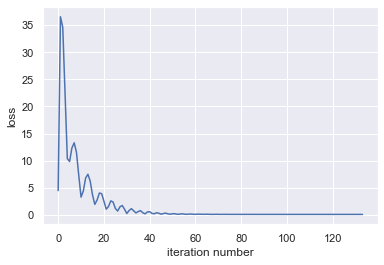

In [28]:
sns.lineplot(data=search_results_adamax['adamax']['loss_history']).set(xlabel='iteration number', ylabel='loss')

Adamax сходится за примерно такое же число итераций, но ошибка падает и возрастает скачками, в отличие от Adam. Ошибка Log-Cosh и R2 получились примерно такие же

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

$$
L(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} \left| a_w(x_i) - y_i \right| \\
\frac{\partial{L(w)}}{\partial{w}} = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} sgn(a_w(x_i) - y_i) \cdot x_i
$$

$$
    L(w) = \frac{1}{\ell} \sum_{i=1}^{\ell} \dfrac{1}{2} (a_w(x_i) - y_i)^2 \cdot \left[\left|a_w(x_i) - y_i\right| \le \delta\right] + \delta \cdot (|a_w(x_i) - y_i| - \frac{1}{2}\delta) \left[\left|a_w(x_i) - y_i\right| > \delta\right]
$$

$$
    \frac{\partial{L(w)}}{\partial{w}} = \frac{1}{\ell} \sum_{i=1}^{\ell} (a_w(x_i) - y_i) \cdot x_i \cdot [\left|a_w(x_i) - y_i\right| \le \delta] + \delta \cdot sgn(a_w(x_i) - y_i) \cdot x_i \cdot [\left|a_w(x_i) - y_i\right| > \delta]
$$

Возьмем $\delta = 1$


Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [19]:
print("Baseline MAE:")
print(1 / y_val.shape[0] * np.abs([y.mean()] * y_val.shape[0] - y_val).sum())

Baseline MAE:
0.9131030566619782


In [18]:
from descents import LossFunction

def get_mae_lr(learn_rate, descent_n):
    conf = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.MAE
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    return reg.calc_loss(X_val, y_val)

descents = ['full', 'stochastic', 'momentum', 'adam']
search_results_mae = {}
for descent in descents:
    best_lr = 0
    best_loss = 1e8
    for lr in np.logspace(-5, 1, 10):
        print(f'{descent} descent with lr={lr}... ')
        loss = get_mae_lr(lr, descent)
        print(f'loss={loss}\n')
        if loss < best_loss:
            best_loss = loss
            best_lr = lr
    search_results_mae[descent] = {
        'best_lr': best_lr,
        'lr_loss': best_loss
    }

full descent with lr=1e-05... 
loss=4.665187551351122

full descent with lr=4.641588833612782e-05... 
loss=5.825638385867264

full descent with lr=0.00021544346900318823... 
loss=4.4862516829647365

full descent with lr=0.001... 
loss=5.661753576137163

full descent with lr=0.004641588833612777... 
loss=6.026738843846191

full descent with lr=0.021544346900318822... 
loss=4.256291411491282

full descent with lr=0.1... 
loss=1.5752620141579716

full descent with lr=0.46415888336127725... 
loss=0.4668214712673635

full descent with lr=2.154434690031882... 
loss=0.3720465127297434

full descent with lr=10.0... 
loss=1.0059686060262218

stochastic descent with lr=1e-05... 
loss=5.724809441758428

stochastic descent with lr=4.641588833612782e-05... 
loss=5.883617055335799

stochastic descent with lr=0.00021544346900318823... 
loss=5.9689661718086775

stochastic descent with lr=0.001... 
loss=5.426304334706554

stochastic descent with lr=0.004641588833612777... 
loss=4.762167770881028

stoch

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

def get_metrics_mae(learn_rate, descent_n):
    conf = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.MAE
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)
    return {'train mse': mean_squared_error(y_train_pred, y_train, squared=True),
            'test mse': mean_squared_error(y_test_pred, y_test, squared=True),
            'train mae': reg.calc_loss(X_train, y_train),
            'test mae': reg.calc_loss(X_test, y_test),
            'test r2': r2_score(y_test, y_test_pred),
            'iter before convergence': len(reg.loss_history)}

r2_metrics_mae = {}
for descent in search_results_mae.keys():
    r2_metrics_mae[descent] = get_metrics_mae(search_results_mae[descent]['best_lr'], descent)

In [23]:
pd.DataFrame(r2_metrics_mae)

,full,stochastic,momentum,adam
train mse,0.352662,0.356944,0.343010,0.338135
test mse,0.349281,0.355098,0.340127,0.335009
train mae,0.370909,0.367734,0.357716,0.354282
test mae,0.370505,0.368200,0.357602,0.354265
test r2,0.718029,0.713332,0.725418,0.729550
iter before convergence,98.000000,301.000000,111.000000,111.000000


R2-метрики стали выше на несколько сотых у full и stochastic, то есть качество улучшилось, у остальных методов оказались меньше. Количество итераций до сходимости увеличилось у всех методов.

In [31]:
from descents import LossFunction

def get_huber_lr(learn_rate, descent_n):
    conf = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.Huber
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    return reg.calc_loss(X_val, y_val)


descents = ['full', 'stochastic', 'momentum', 'adam']
search_results_huber = {}
for descent in descents:
    best_lr = 0
    best_loss = 1e8
    for lr in np.logspace(-5, 1, 10):
        print(f'{descent} descent with lr={lr}... ')
        loss = get_huber_lr(lr, descent)
        print(f'loss={loss}\n')
        if loss < best_loss:
            best_loss = loss
            best_lr = lr
    search_results_huber[descent] = {
        'best_lr': best_lr,
        'lr_loss': best_loss
    }

full descent with lr=1e-05... 
loss=4.394094626936604

full descent with lr=4.641588833612782e-05... 
loss=4.413822595061856

full descent with lr=0.00021544346900318823... 
loss=4.511919433215245

full descent with lr=0.001... 
loss=4.812411196798561

full descent with lr=0.004641588833612777... 
loss=4.718926490146411

full descent with lr=0.021544346900318822... 
loss=3.273567822213708

full descent with lr=0.1... 
loss=0.6226622319249265

full descent with lr=0.46415888336127725... 
loss=0.2564651883771928

full descent with lr=2.154434690031882... 
loss=0.14565316652683014

full descent with lr=10.0... 
loss=0.12942694266947308

stochastic descent with lr=1e-05... 
loss=4.644213654086843

stochastic descent with lr=4.641588833612782e-05... 
loss=4.481593637750832

stochastic descent with lr=0.00021544346900318823... 
loss=4.207601426547934

stochastic descent with lr=0.001... 
loss=5.206211836635372

stochastic descent with lr=0.004641588833612777... 
loss=4.75321255025399

stocha

In [32]:
def get_metrics_huber(learn_rate, descent_n):
    conf = {
        'descent_name': descent_n,
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': learn_rate,
            'loss_function': LossFunction.Huber
        }
    }

    reg = LinearRegression(
        descent_config=conf
    )

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)
    return {'train mse': mean_squared_error(y_train_pred, y_train, squared=True),
            'test mse': mean_squared_error(y_test_pred, y_test, squared=True),
            'train Huber': reg.calc_loss(X_train, y_train),
            'test Huber': reg.calc_loss(X_test, y_test),
            'test r2': r2_score(y_test, y_test_pred),
            'iter before convergence': len(reg.loss_history)}

r2_metrics_huber = {}
for descent in search_results_huber.keys():
    r2_metrics_huber[descent] = get_metrics_huber(search_results_huber[descent]['best_lr'], descent)

In [33]:
pd.DataFrame(r2_metrics_huber)

,full,stochastic,momentum,adam
train mse,0.316070,0.324321,0.317972,0.307423
test mse,0.313590,0.322258,0.314335,0.304709
train Huber,0.128685,0.133464,0.127561,0.124746
test Huber,0.128736,0.133396,0.127233,0.124768
test r2,0.746842,0.739844,0.746241,0.754012
iter before convergence,292.000000,301.000000,94.000000,139.000000


R2-метрики тоже стали лучше у full и stochastic, но хуже у momentum и adam. У full и stochastic сильно возросло количество итераций до сходимости (у SGD дошло до max_iter)

In [35]:
pd.DataFrame(r2_metrics_mae)

,full,stochastic,momentum,adam
train mse,0.352662,0.356944,0.343010,0.338135
test mse,0.349281,0.355098,0.340127,0.335009
train mae,0.370909,0.367734,0.357716,0.354282
test mae,0.370505,0.368200,0.357602,0.354265
test r2,0.718029,0.713332,0.725418,0.729550
iter before convergence,98.000000,301.000000,111.000000,111.000000


Для full наилучшей функцией потерь оказалась Log-Cosh.
Для stochastic наилучшей функцией потерь оказалась Log-Cosh.
Для momentum наилучшей функцией потерь оказалась Log-Cosh.
Для adam наилучшей функцией потерь оказалась MSE.